In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
#cd under the directory of fastai#

In [3]:
cd C:\Users\Teeno\fastai

C:\Users\Teeno\fastai


In [4]:
from fastai.conv_learner import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
arch=resnext101_64

In [5]:
#path that contains the train folder, test folder, and labels.csv for type classification#

In [6]:
PATH ="C:/Users/Teeno/Desktop/result/roof prediction/"   

In [7]:
label_csv= f'{PATH}labels.csv'
n=len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

In [8]:
def get_data(sz,bs):
    tfms=tfms_from_model(arch, sz, aug_tfms=transforms_top_down,max_zoom=1.1)
    data=ImageClassifierData.from_csv(PATH,'train',f'{PATH}labels.csv',test_name='test',num_workers=4,
                                  val_idxs=val_idxs,suffix='.jpg',tfms=tfms,bs=bs)
    return data if sz>300 else data.resize(340,'tmp')

In [9]:
data = get_data(500,5)
learn = ConvLearner.pretrained(arch,data,precompute=False)

In [10]:
learn.load('45_top_roof_res101')

In [11]:
#Path that hosts the images that need to be classified#

In [12]:
PATH = "C:/Users/Teeno/Desktop/result/predict/" 

In [13]:
#change the name of fn#

In [14]:
fn = "com_2_1.jpg"

In [15]:
PATH+fn

'C:/Users/Teeno/Desktop/result/predict/com_2_1.jpg'

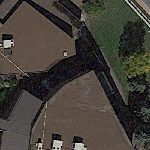

In [16]:
Image.open(PATH+fn).resize((150,150))

In [17]:
trn_tfms,val_tfms=tfms_from_model(arch,500)

In [18]:
ds = FilesIndexArrayDataset([fn],np.array([0]),val_tfms,PATH)
dl = DataLoader(ds)

In [19]:
preds = learn.predict_dl(dl)
np.argmax(preds)

0

In [ ]:
#'0' means membrane; '1' means metal; '2' means shingle; '3' means tile.